<a href="https://colab.research.google.com/github/rohandawar/howto/blob/main/HaarCascadeFaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I am trying to detect a face from a image from unsplash, for this we would need the following.

- An image with a face on it :)
- Pretrained haar cascade xml files for face & eyes detectors


In [30]:
# Import libs
import cv2
import numpy as np
import pandas as pd
from PIL import Image

# requests
import requests

# fecthing anything from google drive
from google.colab import drive


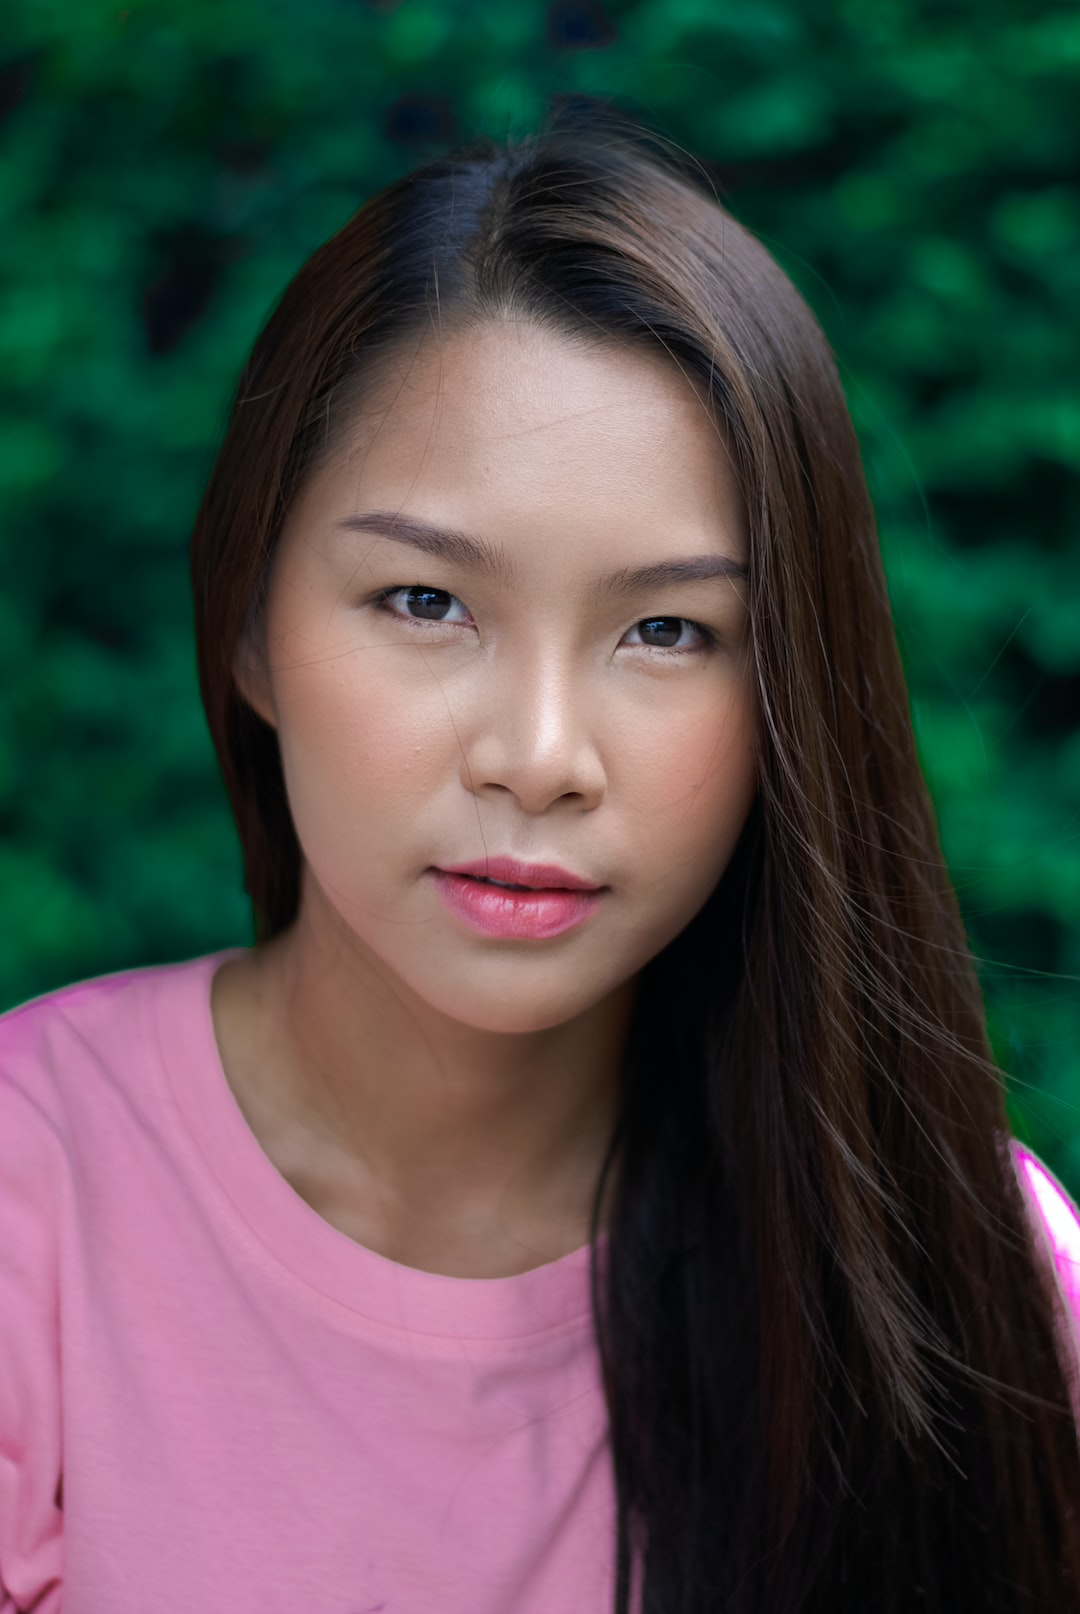

In [31]:
# read the image from unsplash
img = Image.open(requests.get('https://source.unsplash.com/U4JDjYmjn1g', stream=True).raw)
img

In [32]:
# Downloading the models for face & Eye Detection
# !wget 'https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml'
# !wget 'https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml'

In [33]:
# Instiate the dectector 
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_detector = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')

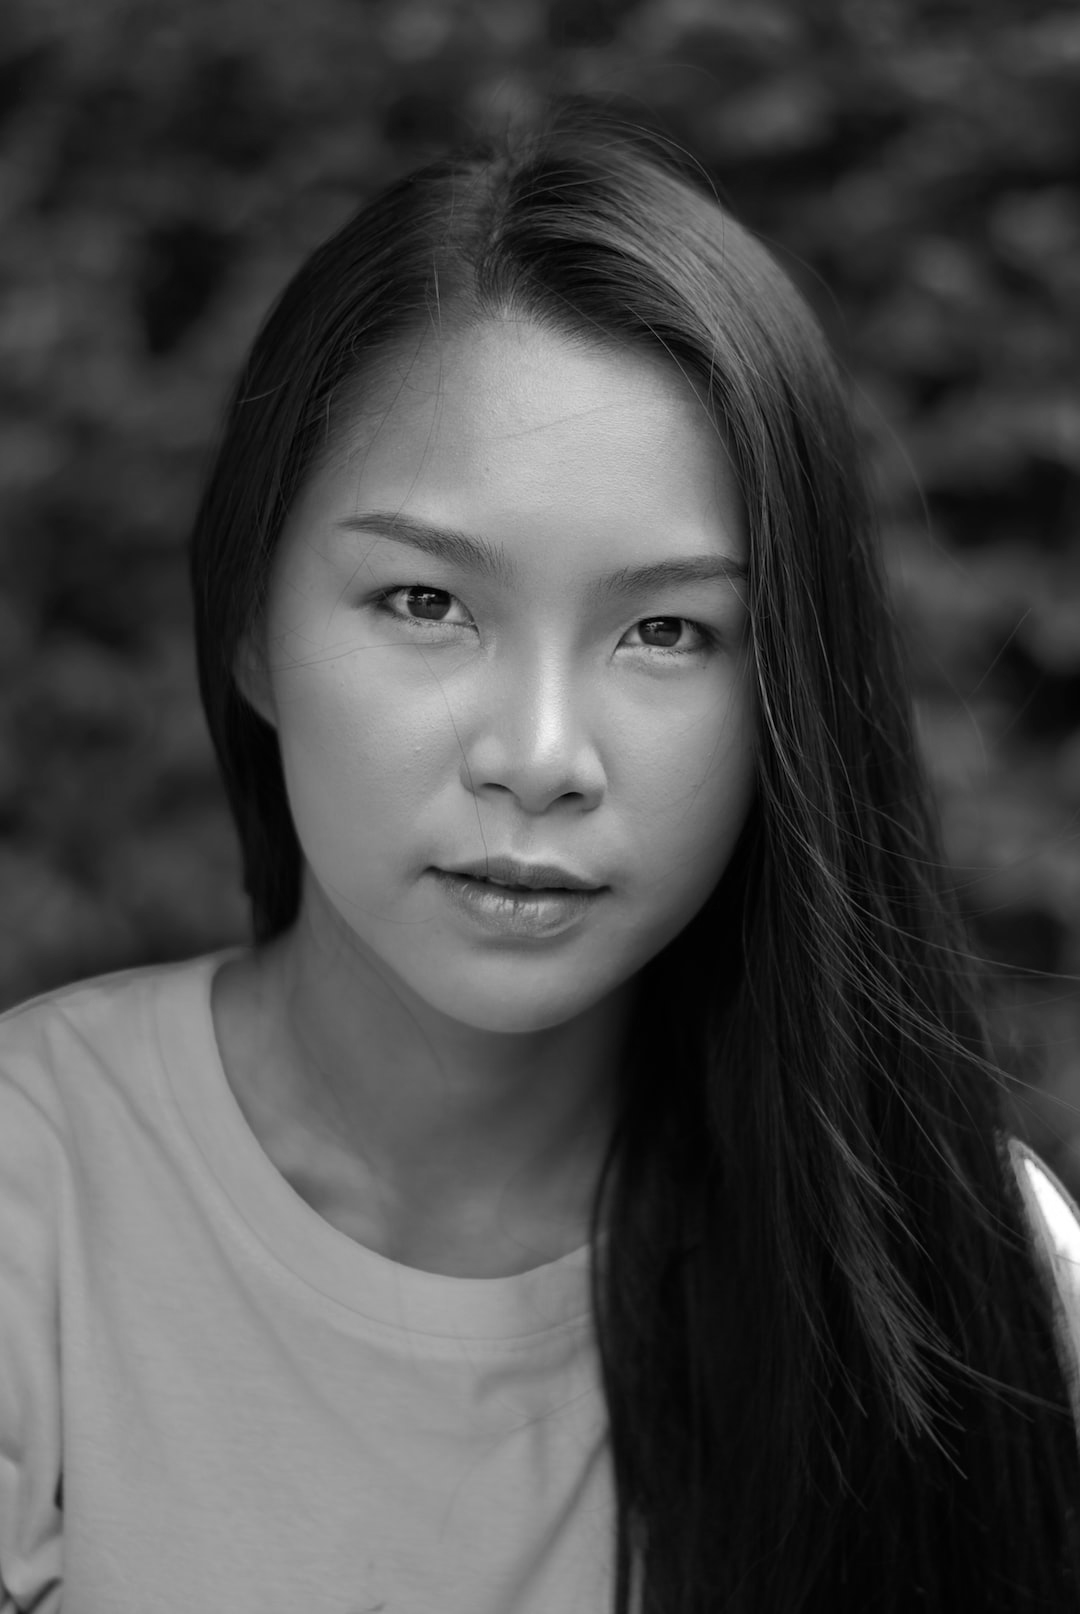

In [34]:
# Converting the image into array
img_array = np.array(img)

# Converting the image into gray Scale
gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

# Checking the image post conversion
Image.fromarray(gray)

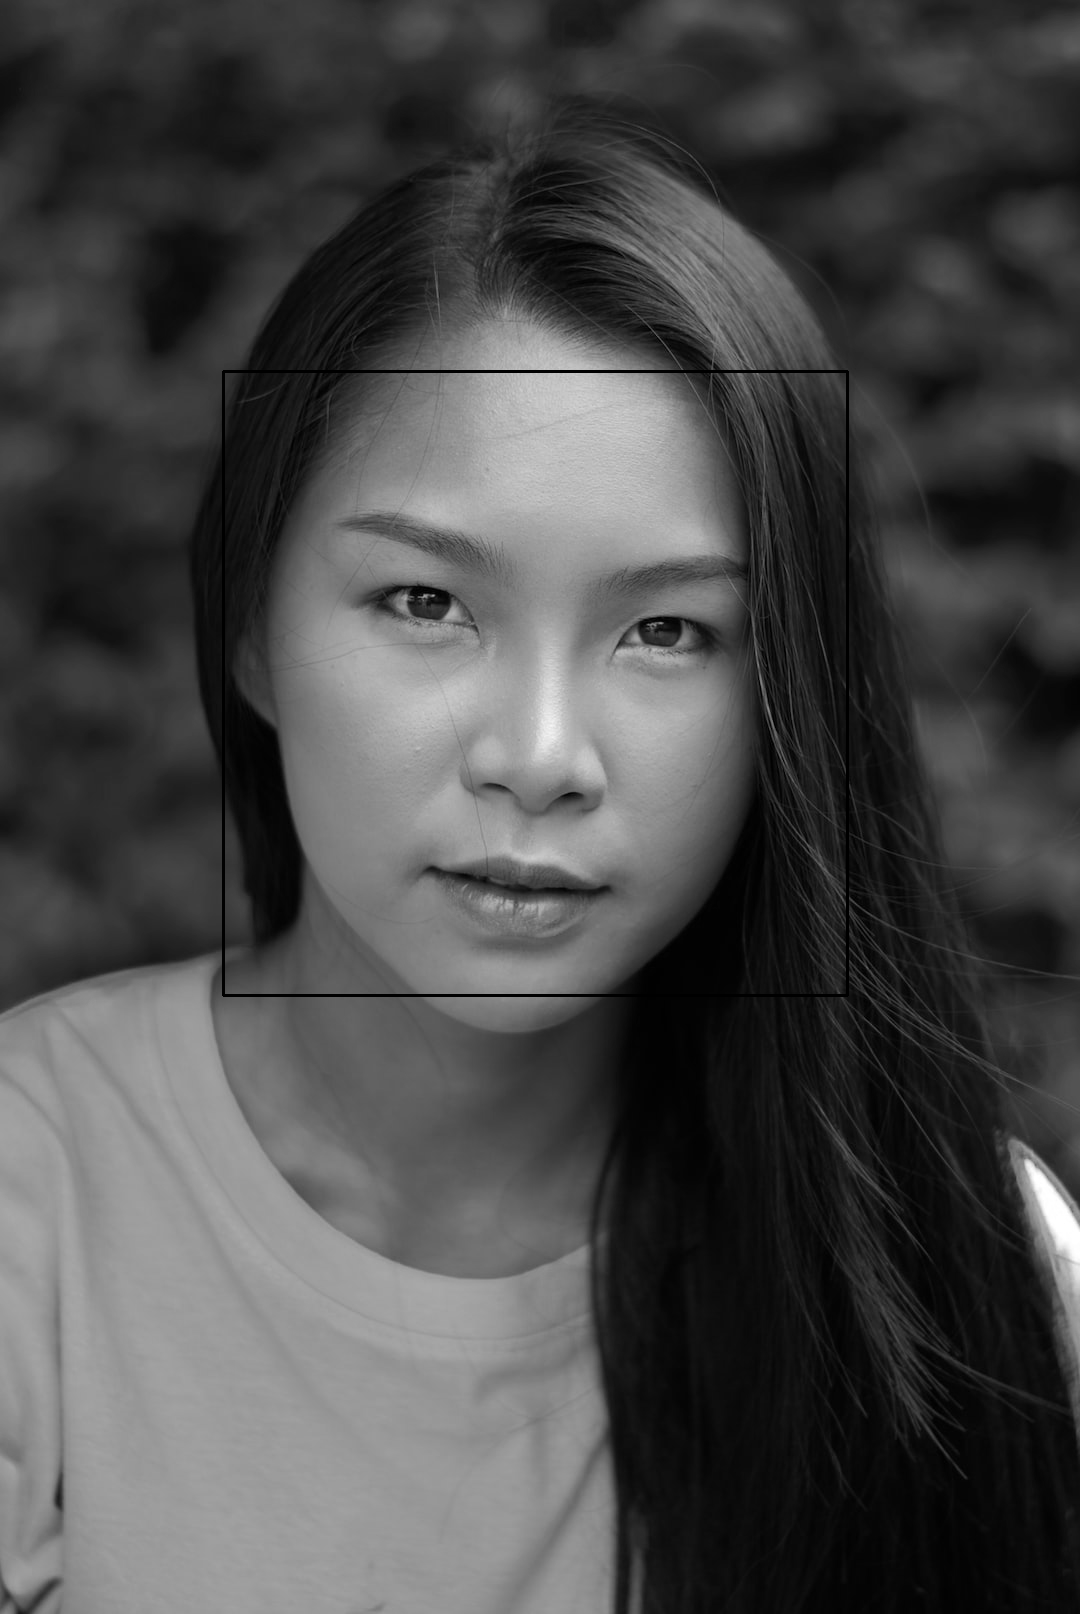

In [35]:
# Lets detect the face
faces = face_detector.detectMultiScale(gray, 1.1,1)

# Run the loop
for (x,y,w,h) in faces:
  cv2.rectangle(gray, (x,y), (x+w, y+h), (0,255,0),2)
Image.fromarray(gray)  

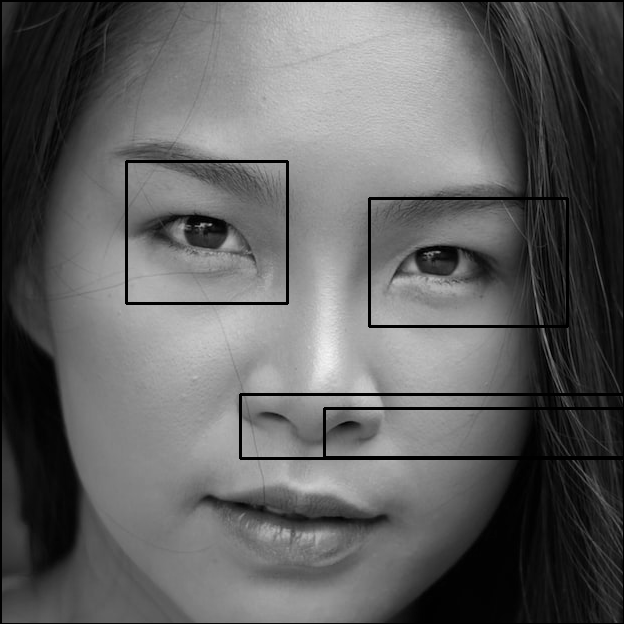

In [36]:
# eyes detector
roi_gray = gray[y:y+h, x:x+w]
# roi_color = img_array[y:y+h, x:x+w]

eyes = eye_detector.detectMultiScale(roi_gray)

for (ex,ey,ew,eh) in eyes:
  cv2.rectangle(roi_gray,(ex,ey),(ex+ey,ey+eh), (0,255,0),2)
Image.fromarray(roi_gray)  